In [2]:
import numpy
import netCDF4
import matplotlib
import matplotlib.pyplot as mp
import datetime
import matplotlib.colors
import scipy.stats
import itertools
import string

import matplotlib.ticker
import cartopy.mpl.gridliner #import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import mpl_toolkits
import cartopy

DEGREE_SIGN = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})

% matplotlib inline

In [3]:
run_info = 'FMAASO'
skip_time=0

# GEO EM FILE

In [4]:
geo_em_ncfile = netCDF4.Dataset('/Users/baird/Dropbox/_data_WRF/geo_em.d01_amazon_50km.nc')
HGT_M = geo_em_ncfile.variables['HGT_M'][0,:,:]

# time, LAT, LON ncfiles

In [5]:
xlat_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_XLAT.nc'
xlong_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_XLONG.nc'
landmask_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_LANDMASK.nc'
times_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_Times_ens_mean.nc'

# import FMAASO 400 data

In [6]:
data_dir = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/400/concat_nc_files/'
filename_prefix = 'wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_'
filename_suffix = '_ens_mean.nc'

time_ncfile = netCDF4.Dataset(times_ncfile_name)
xlat_ncfile = netCDF4.Dataset(xlat_ncfile_name)
xlong_ncfile = netCDF4.Dataset(xlong_ncfile_name)
landmask_ncfile = netCDF4.Dataset(landmask_ncfile_name)

qvapor_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'QVAPOR' + '_ens_mean_vinterp.nc')

pblh_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'PBLH' + filename_suffix)
tk_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'TK' + '_ens_mean_vinterp.nc')

ph_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'PH' + '_ens_mean_vinterp.nc')
phb_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'PHB' + '_ens_mean_vinterp.nc')

qvapor_ncfile.set_auto_mask(False)
tk_ncfile.set_auto_mask(False)
ph_ncfile.set_auto_mask(False)
phb_ncfile.set_auto_mask(False)

In [7]:
time_var = time_ncfile.variables['Times']
time = time_ncfile.variables['Times'][:]
xlat = xlat_ncfile.variables['XLAT'][0,:,:]
xlong = xlong_ncfile.variables['XLONG'][0,:,:]
landmask = landmask_ncfile.variables['LANDMASK'][0,:,:]

plev = qvapor_ncfile.variables['plev'][:]
qvapor_400 = qvapor_ncfile.variables['QVAPOR'][:]
tk_400 = tk_ncfile.variables['TK'][:]
ph_400 = ph_ncfile.variables['PH'][:]
phb_400 = phb_ncfile.variables['PHB'][:]

pblh_400 = pblh_ncfile.variables['PBLH'][:]

In [8]:
qvapor_400[qvapor_400>1e10]=numpy.nan
tk_400[tk_400>1e10]=numpy.nan
ph_400[ph_400>1e10]=numpy.nan
phb_400[phb_400>1e10]=numpy.nan

# import FMAASO 1000 data

In [9]:
data_dir = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/'
filename_prefix = 'wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_'
filename_suffix = '_ens_mean.nc'

time_ncfile = netCDF4.Dataset(times_ncfile_name)
xlat_ncfile = netCDF4.Dataset(xlat_ncfile_name)
xlong_ncfile = netCDF4.Dataset(xlong_ncfile_name)
landmask_ncfile = netCDF4.Dataset(landmask_ncfile_name)

qvapor_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'QVAPOR' + '_ens_mean_vinterp.nc')

pblh_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'PBLH' + filename_suffix)
tk_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'TK' + '_ens_mean_vinterp.nc')
ph_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'PH' + '_ens_mean_vinterp.nc')
phb_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'PHB' + '_ens_mean_vinterp.nc')

qvapor_ncfile.set_auto_mask(False)
tk_ncfile.set_auto_mask(False)
ph_ncfile.set_auto_mask(False)
phb_ncfile.set_auto_mask(False)

In [10]:
time_var_1000 = time_ncfile.variables['Times']
time_1000 = time_ncfile.variables['Times'][:]
xlat = xlat_ncfile.variables['XLAT'][0,:,:]
xlong = xlong_ncfile.variables['XLONG'][0,:,:]
landmask = landmask_ncfile.variables['LANDMASK'][0,:,:]

qvapor_1000 = qvapor_ncfile.variables['QVAPOR'][:]
tk_1000 = tk_ncfile.variables['TK'][:]

pblh_1000 = pblh_ncfile.variables['PBLH'][:]
ph_1000 = ph_ncfile.variables['PH'][:]
phb_1000 = phb_ncfile.variables['PHB'][:]

In [11]:
qvapor_1000[qvapor_1000>1e10]=numpy.nan
tk_1000[tk_1000>1e10]=numpy.nan
ph_1000[ph_1000>1e10]=numpy.nan
phb_1000[phb_1000>1e10]=numpy.nan

In [12]:
ph_tot_400 = ph_400+phb_400
ph_tot_1000 = ph_400+phb_1000

#ph_tot_400[ph_tot_400>1e10]=numpy.nan
#ph_tot_1000[ph_tot_1000>1e10]=numpy.nan

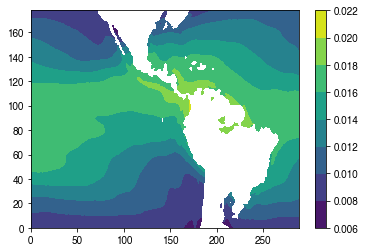

In [13]:
cf=mp.contourf(qvapor_1000[0,0,:,:])
mp.colorbar(cf)

# get time stamps

In [14]:
time_datetimes = numpy.zeros(time.shape[0], dtype=object)
for t in range(time.shape[0]):
    time_string = ''.join([i.decode('utf-8') for i in time[t,:]])
    year,month,day = time_string.split('_')[0].split('-')
    hour,minute,second = time_string.split('_')[1].split(':')
    time_datetimes[t] = datetime.datetime(int(year),int(month),int(day),int(hour),int(second),int(minute))

In [15]:
skip_time = 24
n_intervals = 8
hour_strings = ['00','03','06','09','12','15','18','21']

times_00 = [t.hour in [23,0,1] for t in time_datetimes[skip_time:]]
times_03 = [t.hour in [2,3,4] for t in time_datetimes[skip_time:]]
times_06 = [t.hour in [5,6,7] for t in time_datetimes[skip_time:]]
times_09 = [t.hour in [8,9,10] for t in time_datetimes[skip_time:]]
times_12 = [t.hour in [11,12,13] for t in time_datetimes[skip_time:]]
times_15 = [t.hour in [14,15,16] for t in time_datetimes[skip_time:]]
times_18 = [t.hour in [17,18,19] for t in time_datetimes[skip_time:]]
times_21 = [t.hour in [20,21,22] for t in time_datetimes[skip_time:]]

# constants

In [16]:
L_v = 2264705.0 # J/kg
c_p = 1005.7 # J/kgK
g = 9.80665 # m/s2

# lat indices subset

In [17]:
lat_hi = 10.
lat_lo = -10.
# subset between lat_hi and lat_lo
lat_indices = (xlat<=lat_hi)&(xlat>=lat_lo)

# qvapor diffs

In [18]:
qvapor_diffs = qvapor_1000 - qvapor_400

In [19]:
qvapor_diffs_landmask = numpy.copy(qvapor_diffs)
qvapor_diffs_landmask[:,:,landmask==0]=numpy.nan

qvapor_400_landmask = numpy.copy(qvapor_400)
qvapor_400_landmask[:,:,landmask==0]=numpy.nan

In [20]:
qvapor_diffs_lat_subset = qvapor_diffs[:,:,lat_indices[:,0],:]
qvapor_400_lat_subset = qvapor_400[:,:,lat_indices[:,0],:]

In [21]:
qvapor_diffs_lat_mean = numpy.nanmean(qvapor_diffs_lat_subset, axis=2)
qvapor_400_lat_mean = numpy.nanmean(qvapor_400_lat_subset, axis=2)

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


# calculate MSE on pressure levels

In [22]:
mse_400 = c_p*tk_400 + ph_tot_400 + L_v*qvapor_400
mse_1000 = c_p*tk_1000 + ph_tot_1000 + L_v*qvapor_1000

In [23]:
mse_diffs = mse_1000 - mse_400

In [24]:
#mse_diffs_lat_subset = mse_diffs_landmask[:,:,lat_indices[:,0],:]
#mse_400_lat_subset = mse_400_landmask[:,:,lat_indices[:,0],:]
#mse_1000_lat_subset = mse_1000_landmask[:,:,lat_indices[:,0],:]

mse_diffs_lat_subset = mse_diffs[:,:,lat_indices[:,0],:]
mse_400_lat_subset = mse_400[:,:,lat_indices[:,0],:]
mse_1000_lat_subset = mse_1000[:,:,lat_indices[:,0],:]

In [25]:
mse_diffs_lat_mean = numpy.nanmean(mse_diffs_lat_subset, axis=2)
mse_400_lat_mean = numpy.nanmean(mse_400_lat_subset, axis=2)

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


# PBLH differences

# PBLH lat means

# 3 hourly means of PBLH and QVAPOR lat means

In [30]:
mse_400_t00mean = numpy.nanmean(mse_400_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
mse_400_t03mean = numpy.nanmean(mse_400_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
mse_400_t06mean = numpy.nanmean(mse_400_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
mse_400_t09mean = numpy.nanmean(mse_400_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
mse_400_t12mean = numpy.nanmean(mse_400_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
mse_400_t15mean = numpy.nanmean(mse_400_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
mse_400_t18mean = numpy.nanmean(mse_400_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
mse_400_t21mean = numpy.nanmean(mse_400_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

mse_400_array = numpy.array([mse_400_t00mean, mse_400_t03mean, mse_400_t06mean, mse_400_t09mean, mse_400_t12mean, mse_400_t15mean, mse_400_t18mean, mse_400_t21mean])


/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/

In [31]:
# calculate 3 hourly means for 400
mse_diffs_t00mean = numpy.nanmean(mse_diffs_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
mse_diffs_t03mean = numpy.nanmean(mse_diffs_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
mse_diffs_t06mean = numpy.nanmean(mse_diffs_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
mse_diffs_t09mean = numpy.nanmean(mse_diffs_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
mse_diffs_t12mean = numpy.nanmean(mse_diffs_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
mse_diffs_t15mean = numpy.nanmean(mse_diffs_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
mse_diffs_t18mean = numpy.nanmean(mse_diffs_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
mse_diffs_t21mean = numpy.nanmean(mse_diffs_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

mse_diffs_array = numpy.array([mse_diffs_t00mean, mse_diffs_t03mean, mse_diffs_t06mean, mse_diffs_t09mean, mse_diffs_t12mean, mse_diffs_t15mean, mse_diffs_t18mean, mse_diffs_t21mean])

# monthly mean
#mse_diffs_time_mean = numpy.mean(mse_1000[skip_time:,:,:] - mse_diffs[skip_time:,:,:], axis=0)
#mse_diffs_time_mean_landmask = numpy.copy(mse_diffs_time_mean)
#mse_diffs_time_mean_landmask[landmask==0] = numpy.nan

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9

# qvapor

In [33]:
qvapor_400_t00mean = numpy.nanmean(qvapor_400_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
qvapor_400_t03mean = numpy.nanmean(qvapor_400_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
qvapor_400_t06mean = numpy.nanmean(qvapor_400_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
qvapor_400_t09mean = numpy.nanmean(qvapor_400_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
qvapor_400_t12mean = numpy.nanmean(qvapor_400_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
qvapor_400_t15mean = numpy.nanmean(qvapor_400_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
qvapor_400_t18mean = numpy.nanmean(qvapor_400_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
qvapor_400_t21mean = numpy.nanmean(qvapor_400_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

qvapor_400_array = numpy.array([qvapor_400_t00mean, qvapor_400_t03mean, qvapor_400_t06mean, qvapor_400_t09mean, qvapor_400_t12mean, qvapor_400_t15mean, qvapor_400_t18mean, qvapor_400_t21mean])


/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/

In [34]:
# calculate 3 hourly means for 400
qvapor_diffs_t00mean = numpy.nanmean(qvapor_diffs_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
qvapor_diffs_t03mean = numpy.nanmean(qvapor_diffs_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
qvapor_diffs_t06mean = numpy.nanmean(qvapor_diffs_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
qvapor_diffs_t09mean = numpy.nanmean(qvapor_diffs_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
qvapor_diffs_t12mean = numpy.nanmean(qvapor_diffs_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
qvapor_diffs_t15mean = numpy.nanmean(qvapor_diffs_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
qvapor_diffs_t18mean = numpy.nanmean(qvapor_diffs_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
qvapor_diffs_t21mean = numpy.nanmean(qvapor_diffs_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

qvapor_diffs_array = numpy.array([qvapor_diffs_t00mean, qvapor_diffs_t03mean, qvapor_diffs_t06mean, qvapor_diffs_t09mean, qvapor_diffs_t12mean, qvapor_diffs_t15mean, qvapor_diffs_t18mean, qvapor_diffs_t21mean])

# monthly mean
#qvapor_diffs_time_mean = numpy.mean(qvapor_1000[skip_time:,:,:] - qvapor_diffs[skip_time:,:,:], axis=0)
#qvapor_diffs_time_mean_landmask = numpy.copy(qvapor_diffs_time_mean)
#qvapor_diffs_time_mean_landmask[landmask==0] = numpy.nan

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9

# HGT_M subset

In [ ]:
round(HGT_M.shape[0]/2)

In [ ]:
HGT_M_lat_subset = HGT_M[lat_indices[:,0],:]
HGT_M_lat_subset_maxvals = numpy.max(HGT_M_lat_subset, axis=0)
HGT_M_lat_subset_equator = HGT_M[round(HGT_M_lat_subset.shape[0]/2),:]
HGT_M_lat_subset_minvals = numpy.min(HGT_M_lat_subset, axis=0)
HGT_M_lat_subset_mean = numpy.mean(HGT_M_lat_subset, axis=0)
HGT_M_lat_subset_median = numpy.median(HGT_M_lat_subset, axis=0)

# SET UP PLOT

# background mse

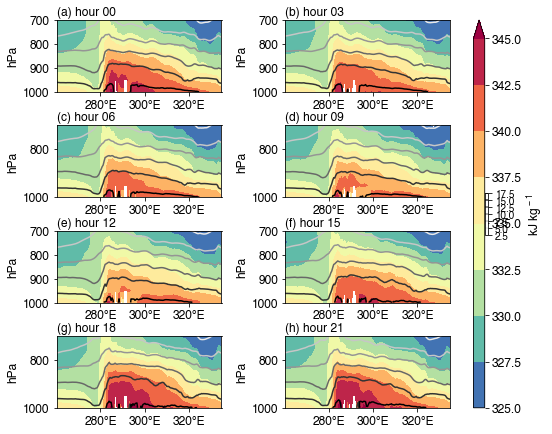

In [64]:
fontsize=12

#nrows=4;ncols=2
#fig,axes = mp.subplots(nrows=nrows,ncols=ncols,subplot_kw={'projection': cartopy.crs.PlateCarree()})
#fig.set_size_inches(3.25,4)

fig = mp.figure(figsize=(6.5,6))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(325,346,2.5)
levels_qvapor = numpy.arange(2.5,17.6,2.5)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

nrows=4;ncols=2
ax_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xlong[0,:]+360.,plev,mse_400_array[t]/1000.,\
                               levels=levels,\
                               cmap='Spectral_r',extend='max')
    #ax.plot(xlong[0,:]+360.,pblh_400_array[t]/1000.,c='firebrick', label='ABLH low CO$_2$')
    #ax.plot(xlong[0,:]+360.,pblh_1000_array[t]/1000.,c='firebrick',ls='--', label='ABLH high CO$_2$')
    
    contour_lines = ax.contour(xlong[0,:]+360.,plev,qvapor_400_array[t]*1000.,\
                               levels=levels_qvapor,\
                               cmap='Greys')
    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(1000,700)
    ax.set_xlim(xlong.min()+55.+360.,xlong.max()+360.)
    
    #ax.fill_between(xlong[0,:]+360., y_zero, HGT_M_lat_subset_mean/1000., facecolor='0.1', interpolate=True)
    
    #ax.set_yticks([0,1,2])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    ax.set_ylabel('hPa', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax_list.append(ax)

fig.tight_layout()

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar_axes.text(s='g kg$^{\,-1}$', x=0.5, y=1.00666, transform=cbar_axes.transAxes, fontsize=fontsize, ha='center', va='bottom')
cbar.set_label('kJ kg$^{\,-1}$', fontsize=fontsize)
#cbar.set_ticks(numpy.arange(-0.8,0.81,0.2))

cbar_qvapor = mp.colorbar(contour_lines)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='upper right', labelspacing=0, \
                   borderaxespad=0, borderpad=0.25, handlelength=1.75, \
                   handletextpad=0.5)

fig.savefig('mse_400_cross_sections.png', dpi=600, bbox_inches='tight', transparent=True)

/Users/baird/anaconda/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


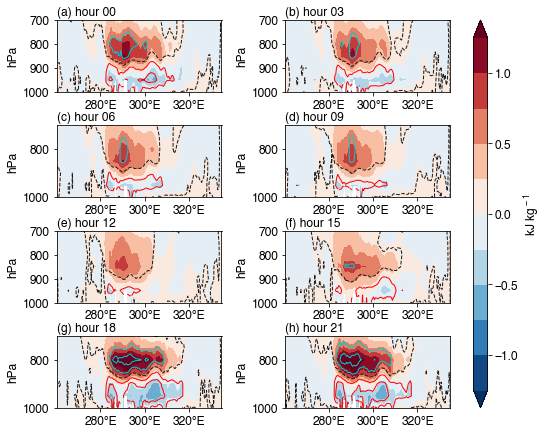

In [75]:
fontsize=12

fig = mp.figure(figsize=(6.5,6))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-1.25,1.26,0.25)
levels_qvapor = numpy.arange(-0.5,0.6,0.25)
colors_qvapor = ['red']*2+['0.1']+['darkturquoise']*2
linestyles_qvapor = ['-']*2+['--']+['-']*2

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

nrows=4;ncols=2
ax_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xlong[0,:]+360.,plev,\
                               mse_diffs_array[t]/1000.,\
                               levels=levels,\
                               cmap='RdBu_r',extend='both')
    #ax.plot(xlong[0,:]+360.,pblh_400_array[t]/1000.,c='0.25', label='ABLH low CO$_2$')
    #ax.plot(xlong[0,:]+360.,pblh_1000_array[t]/1000.,c='firebrick',ls='--', label='ABLH high CO$_2$')
    
    for line in range(levels_qvapor.__len__()):        
        contour_lines = ax.contour(xlong[0,:]+360.,plev,\
                                   qvapor_diffs_array[t]*1000.,\
                                   levels=levels_qvapor[line],\
                                   linewidths=1,\
                                   colors=colors_qvapor[line],\
                                   linestyles=linestyles_qvapor[line])
    
    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(1000,700)
    ax.set_xlim(xlong.min()+55.+360.,xlong.max()+360.)
    
    #ax.fill_between(xlong[0,:]+360., y_zero, HGT_M_lat_subset_mean/1000., facecolor='0.1', interpolate=True)
    
    #ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    ax.set_ylabel('hPa', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax_list.append(ax)

fig.tight_layout()

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar_axes.text(s='g kg$^{\,-1}$', x=0.5, y=1.00666, transform=cbar_axes.transAxes, fontsize=fontsize, ha='center', va='bottom')
cbar.set_label('kJ kg$^{\,-1}$', fontsize=fontsize)
#cbar.set_ticks(numpy.arange(-0.8,0.81,0.2))

#mp.colorbar(contour_lines, pad=10)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='upper right', labelspacing=0, \
                   borderaxespad=0, borderpad=0.25, handlelength=1.75, \
                   handletextpad=0.5)

fig.savefig('mse_diffs_cross_sections.png', dpi=600, bbox_inches='tight', transparent=True)

# figure 6

In [ ]:
fontsize=12

#nrows=4;ncols=2
#fig,axes = mp.subplots(nrows=nrows,ncols=ncols,subplot_kw={'projection': cartopy.crs.PlateCarree()})
#fig.set_size_inches(3.25,4)

fig = mp.figure(figsize=(6.5,6))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-0.75,0.76,0.125)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

nrows=4;ncols=2
ax_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xlong[0,:]+360.,z,qvapor_diffs_array[t]*1000.,levels=levels,cmap='RdBu',extend='both')
    ax.plot(xlong[0,:]+360.,pblh_400_array[t]/1000.,c='0.25', label='ABLH low CO$_2$')
    ax.plot(xlong[0,:]+360.,pblh_1000_array[t]/1000.,c='firebrick',ls='--', label='ABLH high CO$_2$')
    
    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,2.25)
    ax.set_xlim(xlong.min()+55.+360.,xlong.max()+360.)
    
    ax.fill_between(xlong[0,:]+360., y_zero, HGT_M_lat_subset_mean/1000., facecolor='0.1', interpolate=True)
    
    ax.set_yticks([0,1,2])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax_list.append(ax)

fig.tight_layout()

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar_axes.text(s='g kg$^{\,-1}$', x=0.5, y=1.00666, transform=cbar_axes.transAxes, fontsize=fontsize, ha='center', va='bottom')
cbar.set_label('g kg$^{\,-1}$', fontsize=fontsize)
#cbar.set_ticks(numpy.arange(-0.8,0.81,0.2))

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='upper right', labelspacing=0, \
                   borderaxespad=0, borderpad=0.25, handlelength=1.75, \
                   handletextpad=0.5)

fig.savefig('figure6_qvapor_pblh_cross_sections_zoom.png', dpi=600, bbox_inches='tight', transparent=True)

# create FIGURE 7 maps of PBLH change

In [ ]:
import matplotlib.colors

class MidpointNormalize(matplotlib.colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        matplotlib.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return numpy.ma.masked_array(numpy.interp(value, x, y))

In [ ]:
fontsize=12

#nrows=4;ncols=2
#fig,axes = mp.subplots(nrows=nrows,ncols=ncols,subplot_kw={'projection': cartopy.crs.PlateCarree()})
#fig.set_size_inches(3.25,4)

fig = mp.figure(figsize=(3.25,4))

y_zero = numpy.zeros(xlong.shape[1])
#levels = numpy.arange(-100,101,20)
levels = numpy.hstack((numpy.arange(-15,0,5), numpy.arange(0,250,25)))

xticks_deg_E=numpy.array((250,300,325))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

nrows=4;ncols=2
ax_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1, projection=cartopy.crs.PlateCarree())
    ax.set_extent([xlong.min()+25., xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())
    ax.coastlines(resolution='110m')
    
    #contour_plot = ax.contourf(xlong[0,:],xlat[:,0],pblh_diffs_2d_array[t],levels=levels,cmap='Spectral_r',extend='max',\
    #                          norm=MidpointNormalize(midpoint=0.0))
    contour_plot = ax.pcolormesh(xlong[0,:],xlat[:,0],pblh_diffs_2d_array[t,:,:],cmap='magma',vmin=-100,vmax=350)
                                #,vmin=-25,vmax=250,cmap='Spectral_r',\
                                 #norm=MidpointNormalize(midpoint=0.0))
    #ax.contour(xlong[0,:],xlat[:,0],pblh_diffs_2d_array[t],levels=[0])
    
    ax.tick_params(labelsize=fontsize)
    
    #ax.text(s='hour '+hour_strings[t], x=0, y=1.02,\
    #        transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.text(s='h '+hour_strings[t], x=0.05, y=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
    ax_list.append(ax)

# ('+string.ascii_lowercase[t]+') 
fig.tight_layout(w_pad=-2.5, h_pad=0.5)

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1-0.03, bottom_pos.y0, 0.05, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('m', fontsize=fontsize)
#cbar.set_ticks(numpy.arange(-50,451,50))

ax_list[0].text(s='$\Delta$ boundary lyr. ht. (3-hr means)', x=0, y=1.04, transform=ax_list[0].transAxes, fontsize=fontsize, ha='left', va='bottom')

# yticks = [-30,0,30]
# yticks_format = ['30'+DEGREE_SIGN+'S', '0', '30'+DEGREE_SIGN+'N']
# ax_list[0].set_yticks(yticks)
# ax_list[2].set_yticks(yticks)
# ax_list[4].set_yticks(yticks)
# ax_list[6].set_yticks(yticks)
# ax_list[0].set_yticklabels(yticks_format)
# ax_list[2].set_yticklabels(yticks_format)
# ax_list[4].set_yticklabels(yticks_format)
# ax_list[6].set_yticklabels(yticks_format)

# xticks = [-]
# ax_list[6].set_xticks()

fig.savefig('figure7_PBLH_change_map.png', dpi=600, bbox_inches='tight', transparent=True)